<div align='center' ><font size='6'>全连接神经网络的实现</font></div> 

## 实习要求：
**一、实现基本功能：**
   1. 全连接的前向传播与反向传播；
   2. ReLU的前向传播与反向传播；
   3. （选做）Leaky_ReLU的前向传播与反向传播；
   4. （选做）Sigmoid的前向传播与反向传播；
   5. svm loss, softmax loss的计算（可参考实习1）；

**二、实现简单多层全连接神经网络,该网络结构为：input - affine - relu - affine - softmax**
   1. 以L2正则化的softmax损失结束训练；
   2. 实现该网络的损失计算、梯度计算与参数更新；
   3. 以python字典的形式储存可模型中可学习的参数W和B；
   4. （选做）将relu替换为Leaky_ReLU或Sigmoid，尝试比较不同激活函数的差异；
   5. （选做）选择更深的（或更浅的）全连接隐藏层，尝试比较不同深度的网络的差异；
   6. 网络训练的超参数调参；


# 全连接神经网络结构介绍
在本实习中，使用模块化方法实现全连接网络。每一层都要分别实现一个`forward`和一个`backward`函数。`forward `函数将接收输入、权重和其他参数，并返回一个输出和一个`cache`对象来存储向后传递所需的数据，如下所示:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

反向传播将接收上游的导数和`cache`对象，并返回相对于输入和权重的梯度，如下所示:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

在以这种方式实现一堆层之后，我们将能够轻松地将它们组合起来，以构建具有不同架构的分类器。

# 引入模块

In [2]:
from layers import *
from data_loader import *
from two_layer_net import TwoLayerFCNet
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
import matplotlib.pyplot as plt

# 任务一：基本功能的实现
 * 需要补充完善的文件： `layers.py` 

# 全连接层的前向传播
实现 `affine_forward` 功能。完成后需要通过运行以下代码来测试你的实现: 完成目标：difference小于1e-9

In [2]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769847728806635e-10


# 全连接层的反向传播
完成 `affine_backward` 功能并使用数值梯度检查测试你的实现。完成目标：error小于1e-10

In [3]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 6)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU 激活函数的前向传播
在 `relu_forward` 函数中实现ReLU激活函数的前向传递并测试实现。完成目标：相对误差在1e-8量级

In [4]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU 激活函数的反向传播
在 `relu_backward` 函数中为ReLU激活函数实现后向传播，并测试实现。完成目标：相对误差在1e-12量级

In [5]:
# Test the relu_backward function

np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# (选做）Leaky_ReLU 激活函数的前向传播
在 `leaky_relu_forward` 函数中为Leaky_ReLU激活函数实现前向传播，并测试实现。完成目标：相对误差在1e-6量级

In [6]:
# Test the leaky_relu_forward function

x = np.linspace(-0.7, 0.8, num=12).reshape(3, 4)

out, _ = leaky_relu_forward(x)
correct_out = np.array([[-0.007,-0.00563636, -0.00427273, -0.00290909],
                        [-0.00154545, -0.00018182,  0.11818182,  0.25454545],
                        [ 0.39090909,  0.52727273,  0.66363636,  0.8]])

# Compare your output with ours. The error should be on the order of e-6
print('Testing leaky_relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing leaky_relu_forward function:
difference:  4.999974999905571e-06


# (选做）Leaky_ReLU 激活函数的反向传播
在 `leaky_relu_backward` 函数中为Leaky_ReLU激活函数实现后向传播，并测试实现。完成目标：相对误差在1e-12量级

In [7]:
 # Test the leaky_relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: leaky_relu_forward(x)[0], x, dout)

_, cache = leaky_relu_forward(x)
dx = leaky_relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing leaky_relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing leaky_relu_backward function:
dx error:  5.704226124348278e-12


# (选做）sigmoid 激活函数的前向传播
在 `sigmoid_forward` 函数中为sigmoid激活函数实现后向传播，并测试实现。完成目标：相对误差在1e-8量级

In [8]:
# Test the sigmoid_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.37754067, 0.39913012, 0.42111892, 0.44342513],
                        [0.46596182, 0.48863832, 0.51136168, 0.53403818],
                        [0.55657487, 0.57888108, 0.60086988, 0.62245933]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  5.157221295671855e-09


# (选做）sigmoid激活函数的反向传播
在 `sigmoid_backward` 函数中为sigmoid激活函数实现后向传播，并测试实现。完成目标：相对误差在1e-11量级

In [9]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, _)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.446520386706568e-11


# Softmax 和 SVM 损失层
在 `softmax_loss` 和 `svm_loss` 函数中实现softmax和SVM的损失和梯度。与实习1中的实现相似。

通过运行以下命令来确保实现正确

In [10]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be around the order of e-9
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('Testing softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.999602749096233
dx error:  1.4021566006651672e-09
Testing softmax_loss:
loss:  2.302545844500738
dx error:  9.384673161989355e-09


# 任务二：实现简单两层全连接神经网络
打开文件 `two_layer_net.py` 并补充 `TwoLayerFCNet` 类的相关代码。然后运行下面的代码块来测试你的实现。
* 此任务需要补充完善的文件：`two_layer_net.py`

# 初始化网络
测试网络初始化代码的实现，完成目标：网络参数的初始化符合要求

In [11]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerFCNet(input_size=D, hidden_size=H, output_size=C, std=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'
print('Done')

Testing initialization ... 
Done


# 前向传播: 计算得分
打开文件 `fc_net.py` ，查看 `MultiLayerFCNet.loss`. 这个函数非常类似于你为SVM和Softmax练习编写的损失函数:它获取数据和权重，并计算类分数、损失和参数上的梯度。  
实现正向传递的第一部分，该部分使用权重和偏差来计算所有输入的分数。
完成目标：计算得分与实际得分差异小于1e-6

In [12]:
print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)

X = np.linspace(-5.5, 4.5, num=N * D).reshape(D, N).T
scores = model.loss(X)
print('your scores are:\n', scores)
correct_scores = np.asarray(
    [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
print('correct scores are:\n', correct_scores)
scores_diff = np.abs(scores - correct_scores).sum()
print('Difference between your scores and correct scores:', scores_diff)

Testing test-time forward pass ... 
your scores are:
 [[11.53165108 12.2917344  13.05181771 13.81190102 14.57198434 15.33206765
  16.09215096]
 [12.05769098 12.74614105 13.43459113 14.1230412  14.81149128 15.49994135
  16.18839143]
 [12.58373087 13.20054771 13.81736455 14.43418138 15.05099822 15.66781506
  16.2846319 ]]
correct scores are:
 [[11.53165108 12.2917344  13.05181771 13.81190102 14.57198434 15.33206765
  16.09215096]
 [12.05769098 12.74614105 13.43459113 14.1230412  14.81149128 15.49994135
  16.18839143]
 [12.58373087 13.20054771 13.81736455 14.43418138 15.05099822 15.66781506
  16.2846319 ]]
Difference between your scores and correct scores: 5.1158512093252284e-08


# 前向传播: 计算损失
在同一函数中，实现计算数据和正则化损失的第二部分。
完成目标：计算得分与实际得分差异小于1e-6

In [13]:
print('Testing training loss')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
print('training loss (no regularization): ', loss)
correct_loss = 3.4702243556
diff = abs(loss - correct_loss)
print('Difference between your loss and correct loss:', diff)

model.reg = 1.0
loss, grads = model.loss(X, y)
print('training loss (L2 regularization): ', loss)
correct_loss = 26.5948426952
diff = abs(loss - correct_loss)
print('Difference between your loss and correct loss:', diff)

Testing training loss
training loss (no regularization):  3.47022435559539
Difference between your loss and correct loss: 4.6100900874535e-12
training loss (L2 regularization):  3.47022435559539
Difference between your loss and correct loss: 23.12461833960461


# 反向传播
实现函数的其余部分。计算变量 `W1`, `b1`, `W2`, `b2`的损失梯度。实现了前向传播后，你可以使用数值梯度检查来调试向后传递。
完成目标：误差小于1e-7

In [14]:
# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running numeric gradient check with reg =  0.0
W1 relative error: 1.52e-08
W2 relative error: 3.48e-10
b1 relative error: 6.55e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 1.52e-08
W2 relative error: 3.48e-10
b1 relative error: 6.55e-09
b2 relative error: 4.33e-10


# 训练两层全连接网络
我使用随机梯度下降(SGD)训练网络，类似于SVM和Softmax分类器。
完成 `TwoLayerNet.train` 函数缺失的部分。该过程非常类似于你用于SVM和Softmax分类器的训练过程。
实现 `TwoLayerNet.predict` 函数，当网络进行训练时，训练过程周期性地进行预测，以跟踪精度随时间的变化。 
完成目标：Final training loss在1.4左右

Final training loss:  1.3924189227365347


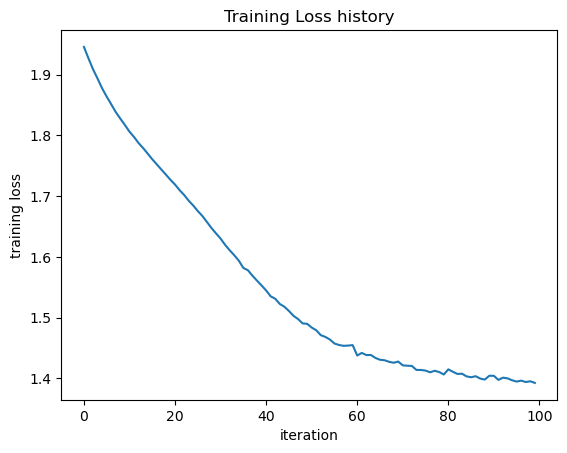

In [15]:
# Train a mini network
net = TwoLayerFCNet(input_size=D, hidden_size=H, output_size=C, std=std)
stats = net.train(X, y, X, y,
                  learning_rate=1e-1, reg=5e-6,
                  num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# 在HelloRS32上训练两层全连接网络
现在，你已经实现了一个通过梯度检查并处理简单数据的两层全连接网络，加载 `HelloRS32` 数据，使用它来训练一个分类器来处理真实的数据集。

# 加载HelloRS32数据

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


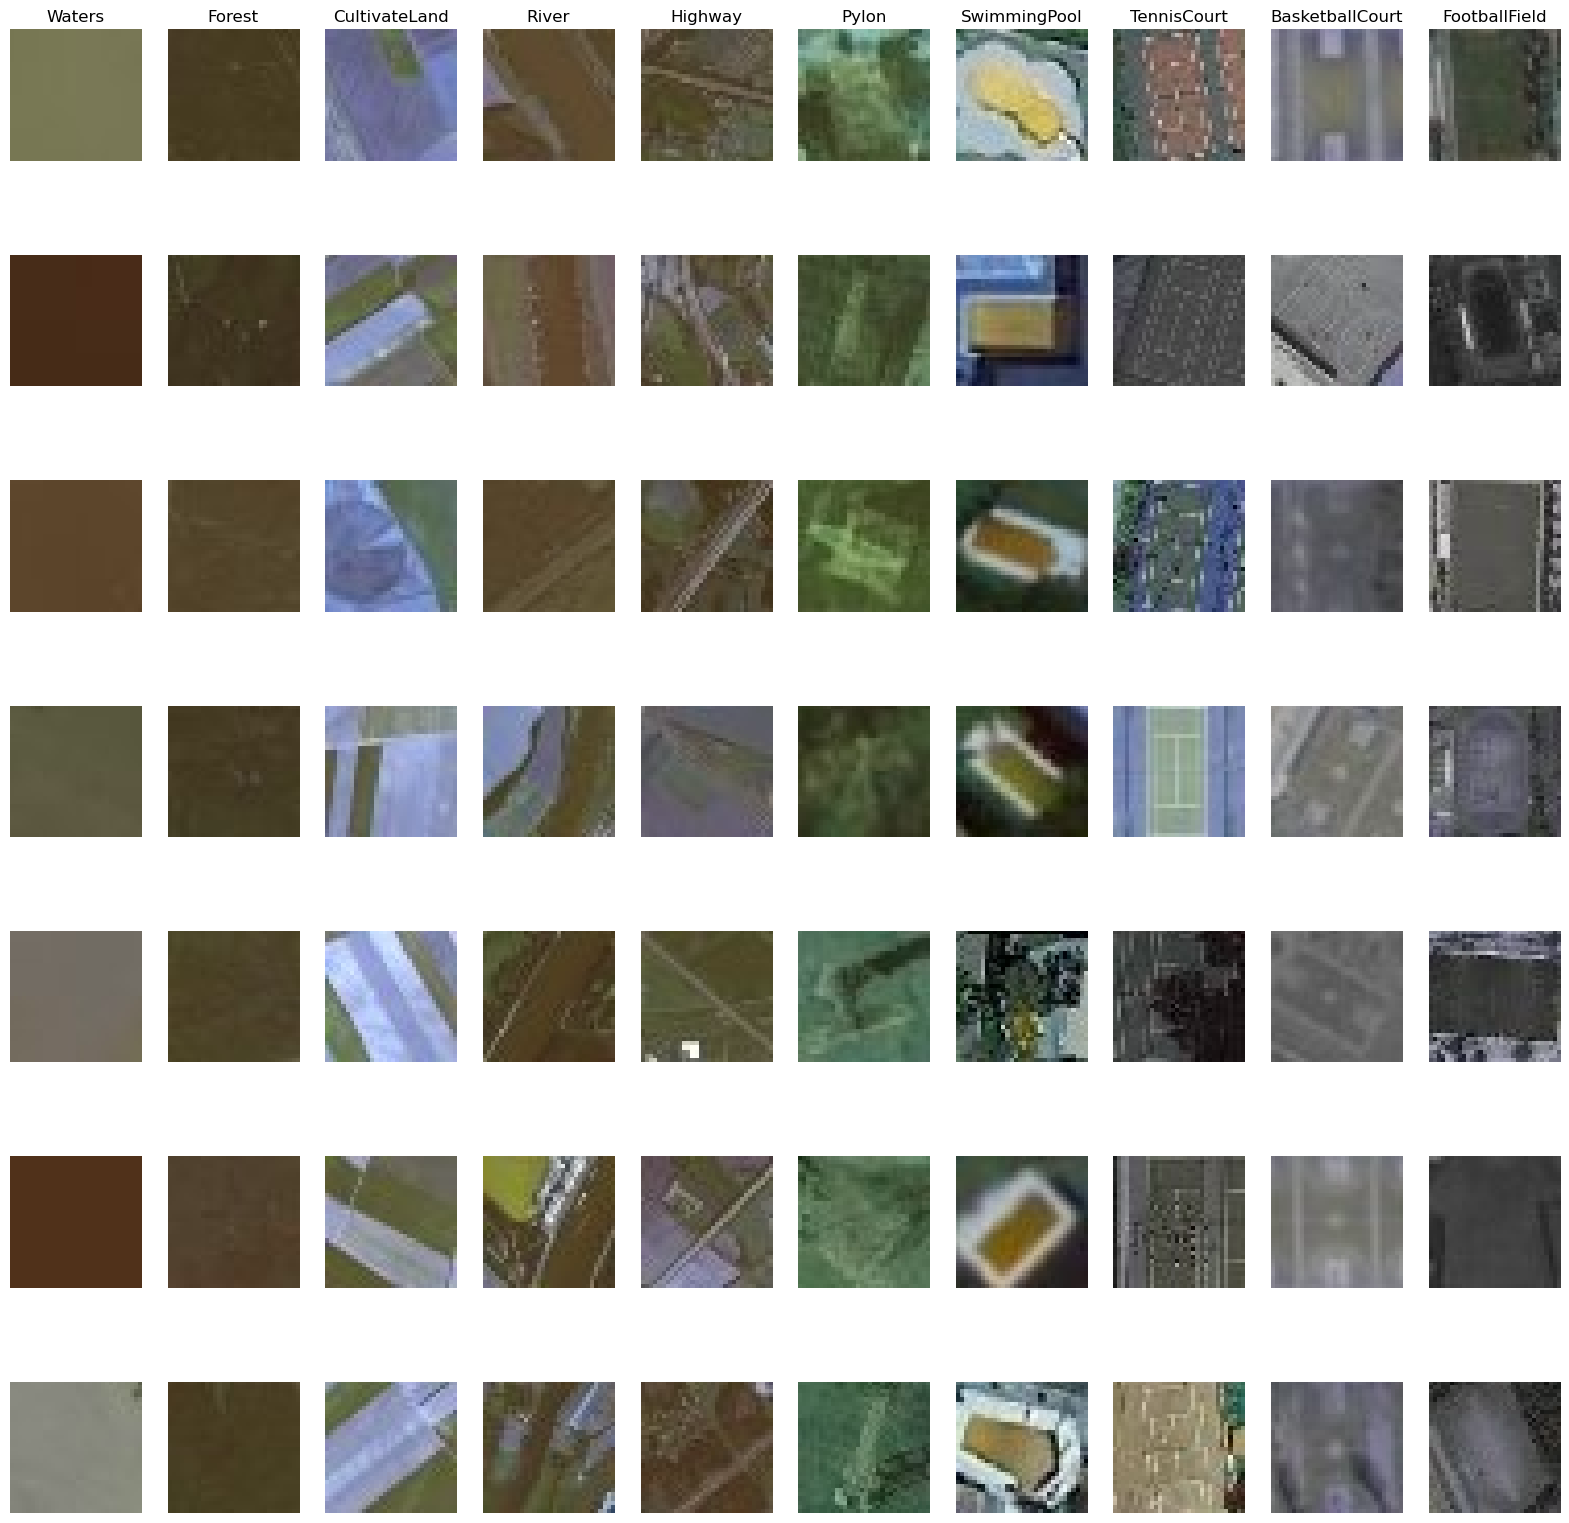

Xtrain.shape: (7200, 3072)
Ytrain.shape: (7200,)
Xval.shape: (1200, 3072)
Yval.shape: (1200,)
Xtest.shape: (3600, 3072)
Xtest.shape: (3600,)


In [16]:
# 加载数据集
%load_ext autoreload
%autoreload 2
root = "D:\\jupyter notebook\\RS32\\all\\train.csv"

X, Y = load_data(root)
num_image = 12000
X = X[:num_image]
Y = Y[:num_image]

# 数据集划分
num_train = int(len(X) * 0.6)
num_val = int(len(X) * 0.1)
num_test = int(len(X) * 0.3)
Xtrain = X[:num_train]
Ytrain = Y[:num_train]
Xval = X[num_train:num_train + num_val]
Yval = Y[num_train:num_train + num_val]
Xtest = X[num_train + num_val:]
Ytest = Y[num_train + num_val:]

#数据显示
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
visualize_samples(classes, Xtrain, Ytrain)

# 数据预处理
Xtrain, Xval, Xtest = data_processing(Xtrain, Xval, Xtest)
print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xval.shape:', Xval.shape)
print('Yval.shape:', Yval.shape)
print('Xtest.shape:', Xtest.shape)
print('Xtest.shape:', Ytest.shape)

# 训练全连接网络

使用SGD训练网络。 优化时使用指数学习率时间表来调整学习速率; 在每个epoch之后，通过将学习速率乘以衰减速率来降低学习速率。按照如下的参数设置运行，实现目标：val_acc接近0.69

In [17]:
# Train a network
input_size = 3 * 32 * 32
hidden_size = 100
output_size = 10
model = TwoLayerFCNet(input_size, hidden_size, output_size, std=1e-3)

# Train the network
start_time = time.time()
stats = model.train(Xtrain, Ytrain, Xval, Yval,
                    num_iters=2000, batch_size=200,
                    learning_rate=1e-3, learning_rate_decay=0.95,
                    reg=0.25, verbose=True)

# Predict on the validation set

val_acc = (model.predict(Xval) == Yval).mean()
print('Validation accuracy: ', val_acc)
print('consuming:', time.time() - start_time)

iteration 0 / 2000: loss 2.341235
iteration 100 / 2000: loss 1.283467
iteration 200 / 2000: loss 1.004903
iteration 300 / 2000: loss 0.903897
iteration 400 / 2000: loss 0.873727
iteration 500 / 2000: loss 0.843978
iteration 600 / 2000: loss 0.741014
iteration 700 / 2000: loss 0.861344
iteration 800 / 2000: loss 0.749585
iteration 900 / 2000: loss 0.746532
iteration 1000 / 2000: loss 0.734966
iteration 1100 / 2000: loss 0.645883
iteration 1200 / 2000: loss 0.677142
iteration 1300 / 2000: loss 0.712374
iteration 1400 / 2000: loss 0.662624
iteration 1500 / 2000: loss 0.633188
iteration 1600 / 2000: loss 0.701625
iteration 1700 / 2000: loss 0.712728
iteration 1800 / 2000: loss 0.650731
iteration 1900 / 2000: loss 0.745268
Validation accuracy:  0.7266666666666667
consuming: 14.511817932128906


# 调试训练 
使用上面提供的默认参数，在验证集中获得大约0.69的验证精度。

如果想要提高精度，一个方法是在优化过程中绘制损失函数以及训练和验证集的准确性；另一个方法是可视化在网络的第一层训练出的权值。 在大多数以视觉数据为训练对象的神经网络中，第一层权值在可视化时通常呈现出一些可视化的结构。


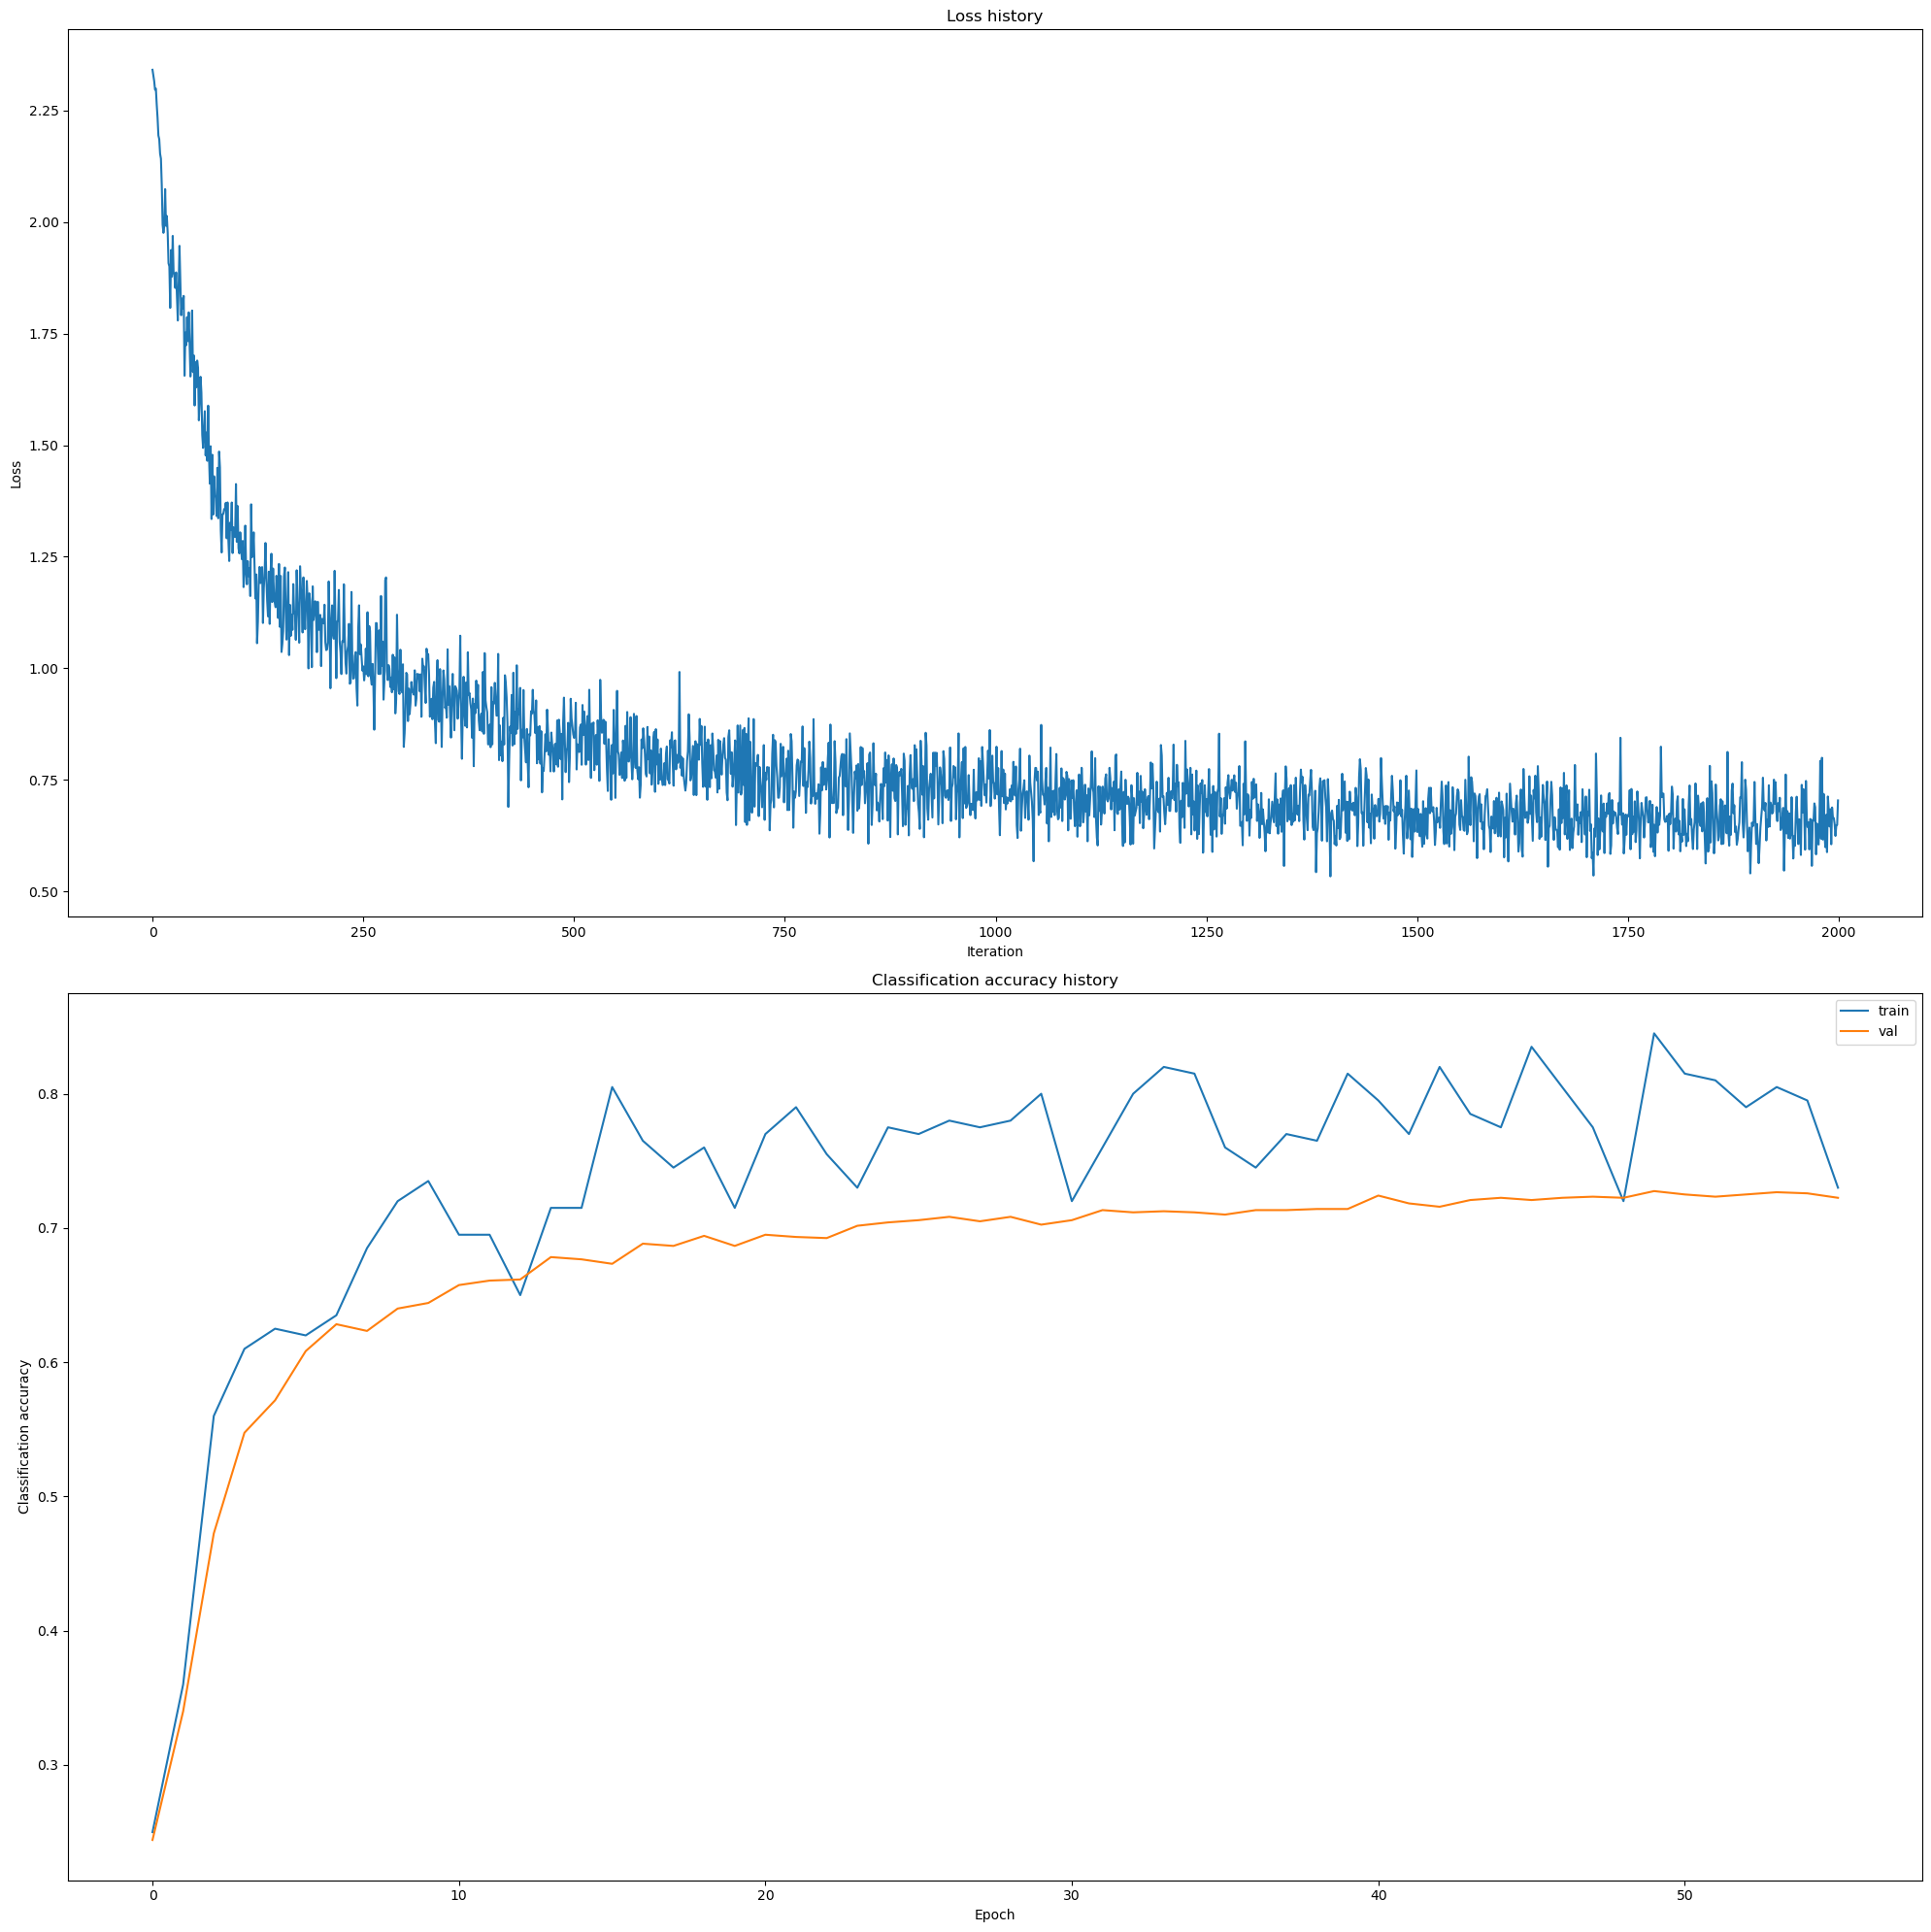

In [18]:
# Plot the loss function and train / validation accuracies

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()#avoid overlap 
plt.show()

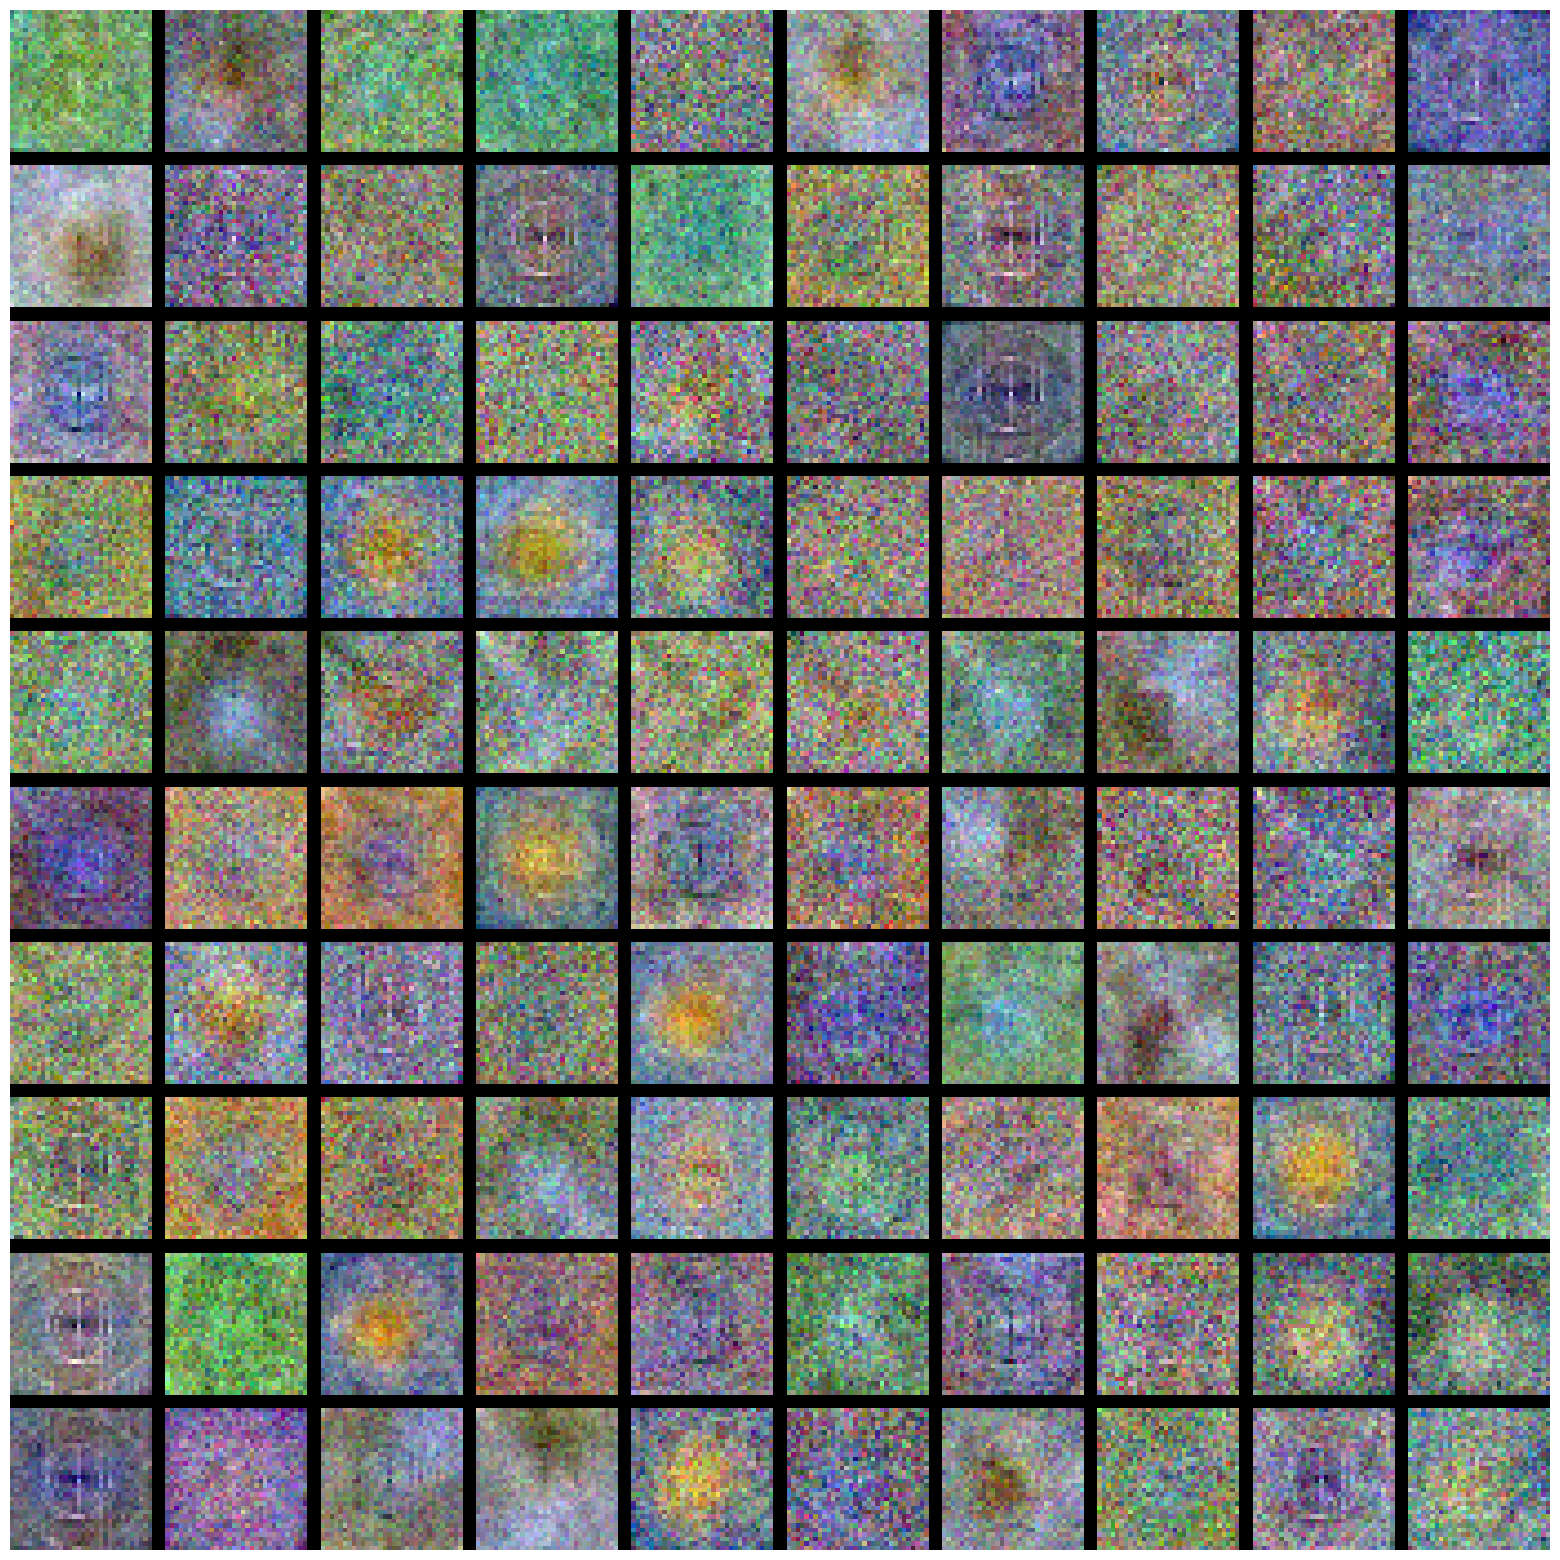

In [19]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

# 优化超参数
通过观察如上可视化图，我们可以看到损失呈或多或少的线性下降，这似乎表明学习速率可能过低；此外，在训练和验证精度之间没有差距，说明使用的模型容量较低，我们应该增加它的规模；另一方面，一个非常大的模型会产生更多的过拟合，说明训练和验证准确性之间有较大差距。  
 
调优：调整超参数是使用神经网络的一个重要部分，你应该大量练习超参数的调整。接下来，使用各种超参数的不同值进行实验，包括隐藏层大小(hidden_size)、学习速率(learning_rate)、训练周期数(num_iters)和正则化强度(reg)。也可以考虑调整学习速率衰减(learning_rate_decay)，但是应该能够使用默认值获得良好的性能。  

近似结果： 你的目标应该是在验证集上产生65%以上的准确性

实验：在这个练习中，你的目标是用全连接神经网络在HelloRS32上取得尽可能好的成绩。 可以使用任意技术来提高精度(例如使用PCA来降低维度，或添加dropout，或为求解器添加功能，等等)。  

In [20]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
best_val_acc = 0
best_net = None

# learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
# regularization_strengths = [0.75, 1, 1.25]

best_val = -1
input_size = 32 * 32 * 3
hidden_size = [100, 200, 500]
learning_rates = [8e-4,1e-3,1.5e-3]
# lr = 1e-2和1e-1时均为0.11583333
regularizations = [0.001, 0.005, 0.01]
num_classes = 10
for hs in hidden_size:
    net = TwoLayerFCNet(input_size, hs,num_classes)
    for lr in learning_rates:
        for reg in regularizations:
            stats = net.train(Xtrain, Ytrain, Xval, Yval,
                          num_iters=2000,batch_size=200,
                          learning_rate=lr,learning_rate_decay=0.95,
                          reg=reg, verbose=False)
            val_acc = (net.predict(Xval) == Yval).mean()
            print ("hs",hs, "lr ",lr, "reg ", reg, "val accuracy:", val_acc)
            if val_acc > best_val:
                best_val = val_acc
                best_net = net
print ("best validation accuracyachieved during cross-validation: ", best_val)

hs 100 lr  0.0008 reg  0.001 val accuracy: 0.6841666666666667
hs 100 lr  0.0008 reg  0.005 val accuracy: 0.7391666666666666
hs 100 lr  0.0008 reg  0.01 val accuracy: 0.76
hs 100 lr  0.001 reg  0.001 val accuracy: 0.755
hs 100 lr  0.001 reg  0.005 val accuracy: 0.7533333333333333
hs 100 lr  0.001 reg  0.01 val accuracy: 0.7475
hs 100 lr  0.0015 reg  0.001 val accuracy: 0.7466666666666667
hs 100 lr  0.0015 reg  0.005 val accuracy: 0.745
hs 100 lr  0.0015 reg  0.01 val accuracy: 0.7491666666666666
hs 200 lr  0.0008 reg  0.001 val accuracy: 0.695
hs 200 lr  0.0008 reg  0.005 val accuracy: 0.7358333333333333
hs 200 lr  0.0008 reg  0.01 val accuracy: 0.7458333333333333
hs 200 lr  0.001 reg  0.001 val accuracy: 0.7508333333333334
hs 200 lr  0.001 reg  0.005 val accuracy: 0.7566666666666667
hs 200 lr  0.001 reg  0.01 val accuracy: 0.7591666666666667
hs 200 lr  0.0015 reg  0.001 val accuracy: 0.7558333333333334
hs 200 lr  0.0015 reg  0.005 val accuracy: 0.7558333333333334
hs 200 lr  0.0015 reg 

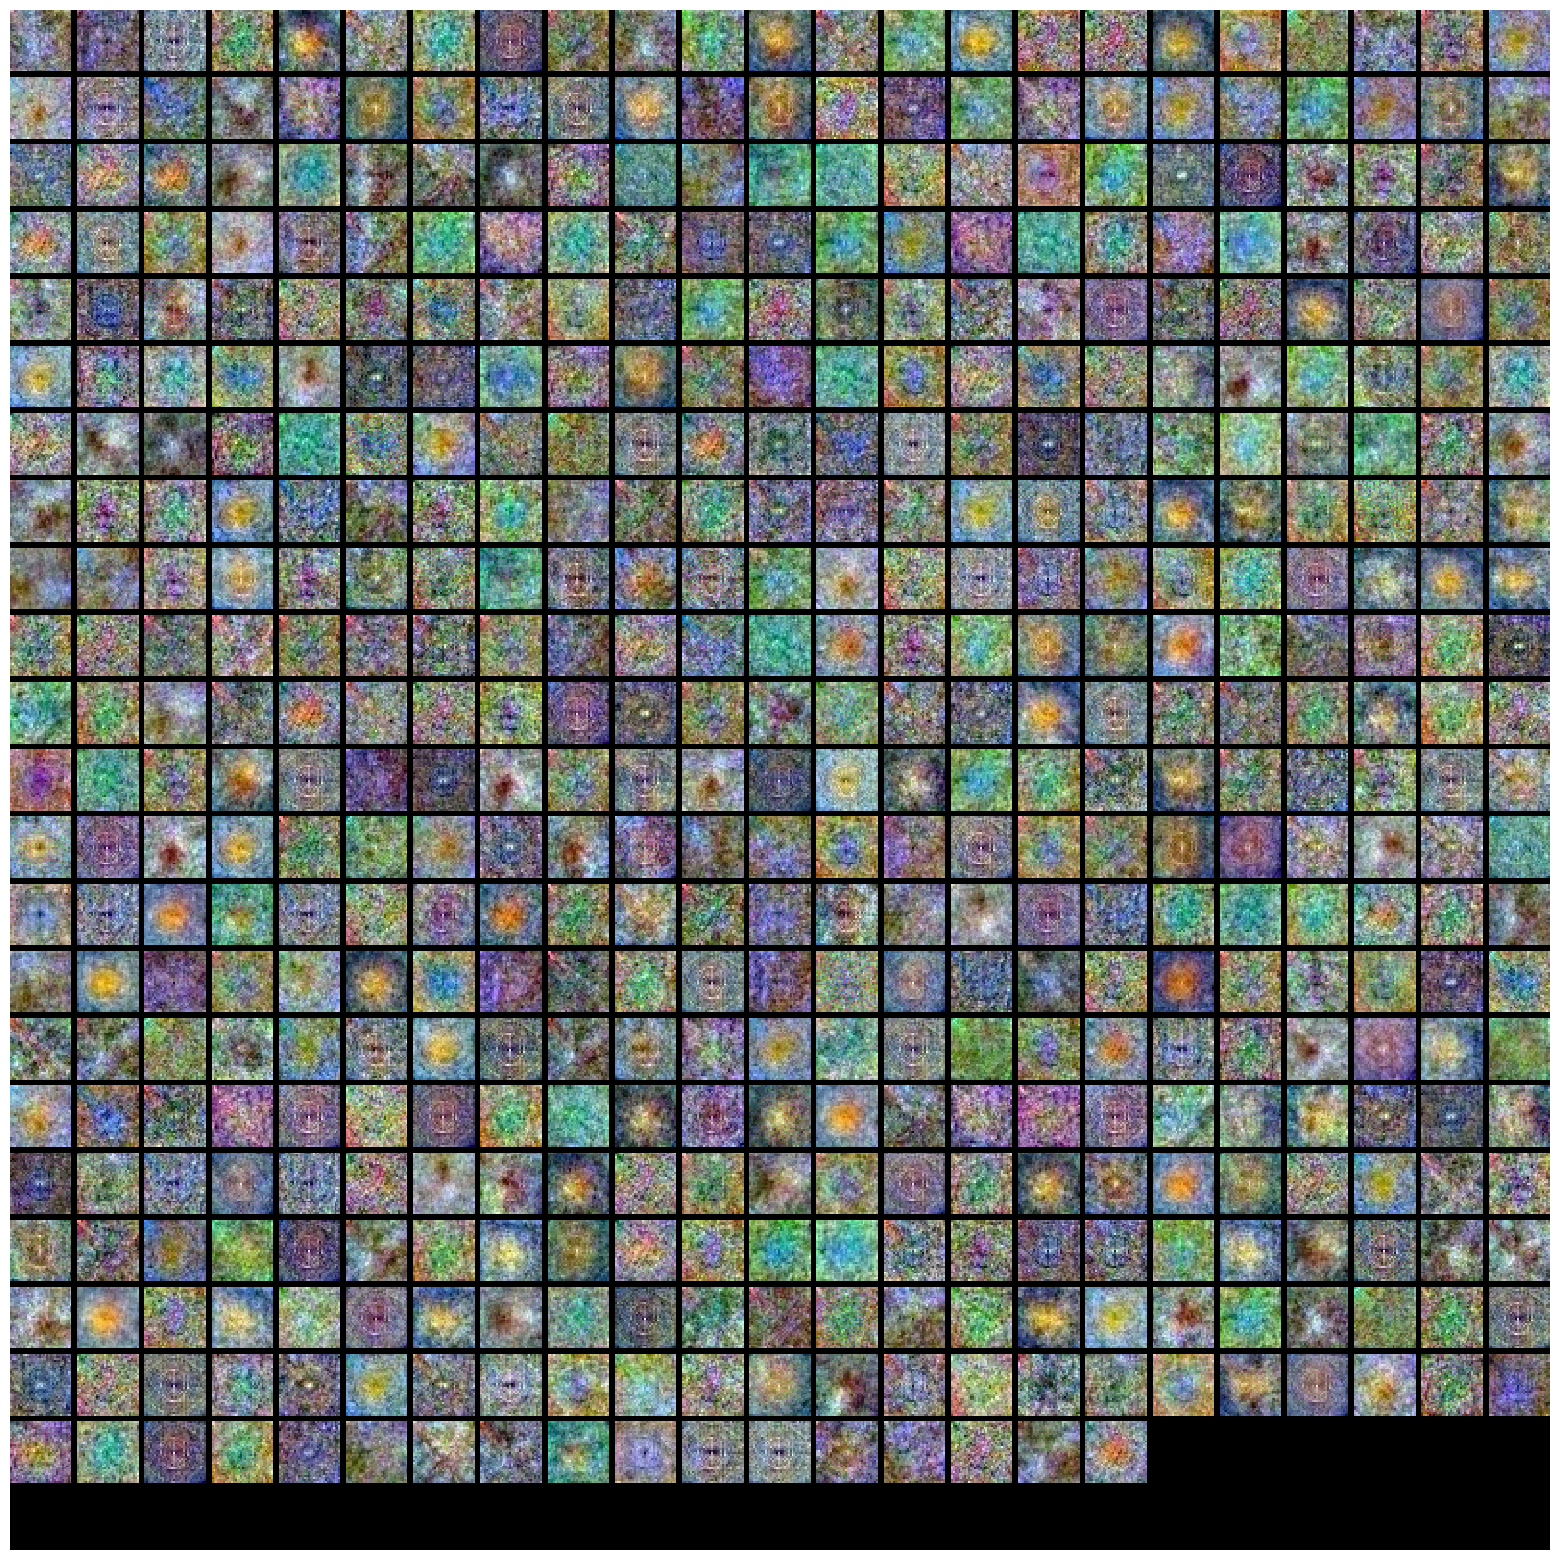

In [21]:
# visualize the weights of the best network
show_net_weights(best_net)

# 在测试集上运行你的模型
在验证和测试集中运行你最好的模型。在测试集上达到70%左右的准确率。  

In [22]:
val_acc = (best_net.predict(Xval) == Yval).mean()
test_acc = (best_net.predict(Xtest) == Ytest).mean()
print('Validation accuracy: ', val_acc)
print('Test set accuracy: ', test_acc)

Validation accuracy:  0.7633333333333333
Test set accuracy:  0.7852777777777777
